<a href="https://colab.research.google.com/github/ARPITA-SARKER/CVPR/blob/main/assignment_1_KNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm


In [3]:
DATA_PATH ="/content/drive/MyDrive/CIFAR-10-images/test"

In [4]:
CATAGORIES=os.listdir(DATA_PATH)
TRAIN_DATA =[]
class_name=[]
for c in CATAGORIES:
  path=os.path.join(DATA_PATH,c)
  print(path)
  for img in tqdm(os.listdir(path)):
   img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
   TRAIN_DATA.append([img_arr,CATAGORIES.index(c)])
  class_name.append(c)
random.shuffle(TRAIN_DATA)


/content/drive/MyDrive/CIFAR-10-images/test/truck


100%|██████████| 1010/1010 [00:13<00:00, 76.86it/s] 


/content/drive/MyDrive/CIFAR-10-images/test/dog


100%|██████████| 1000/1000 [00:18<00:00, 53.84it/s]


/content/drive/MyDrive/CIFAR-10-images/test/automobile


100%|██████████| 1010/1010 [00:14<00:00, 68.23it/s]


/content/drive/MyDrive/CIFAR-10-images/test/deer


100%|██████████| 1010/1010 [00:14<00:00, 68.12it/s] 


/content/drive/MyDrive/CIFAR-10-images/test/frog


100%|██████████| 1000/1000 [00:14<00:00, 71.32it/s]


/content/drive/MyDrive/CIFAR-10-images/test/ship


100%|██████████| 1000/1000 [00:16<00:00, 60.91it/s]


/content/drive/MyDrive/CIFAR-10-images/test/bird


100%|██████████| 1000/1000 [00:15<00:00, 66.16it/s]


/content/drive/MyDrive/CIFAR-10-images/test/cat


100%|██████████| 1000/1000 [00:25<00:00, 39.46it/s]


/content/drive/MyDrive/CIFAR-10-images/test/horse


100%|██████████| 1000/1000 [00:14<00:00, 69.31it/s]


/content/drive/MyDrive/CIFAR-10-images/test/airplane


100%|██████████| 1000/1000 [00:15<00:00, 64.87it/s]


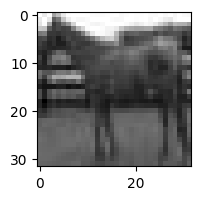

In [5]:
plt.figure(figsize=(5,2))
plt.imshow(TRAIN_DATA[1][0], cmap = 'gray', aspect='equal')

In [6]:
f0 = TRAIN_DATA[0:200]
f1 = TRAIN_DATA[200:400]
f2 = TRAIN_DATA[400:600]
f3 = TRAIN_DATA[600:800]
f4 = TRAIN_DATA[800:1000]

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        accuracy_l1 = correct_l1 / total
        accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)

    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)


accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)


avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)




Fold 0 K = 1 Manhattan (L1) Accuracy: 0.2
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.155
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.14
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.095
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.16
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.115
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.155
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.185
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.135
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.125
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.195
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.19
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.14
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.1
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.14
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.125
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.13
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.175
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.145
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.135
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.205
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.19
Fold 1 K = 3 Manhattan (L1) Accuracy: 0.135

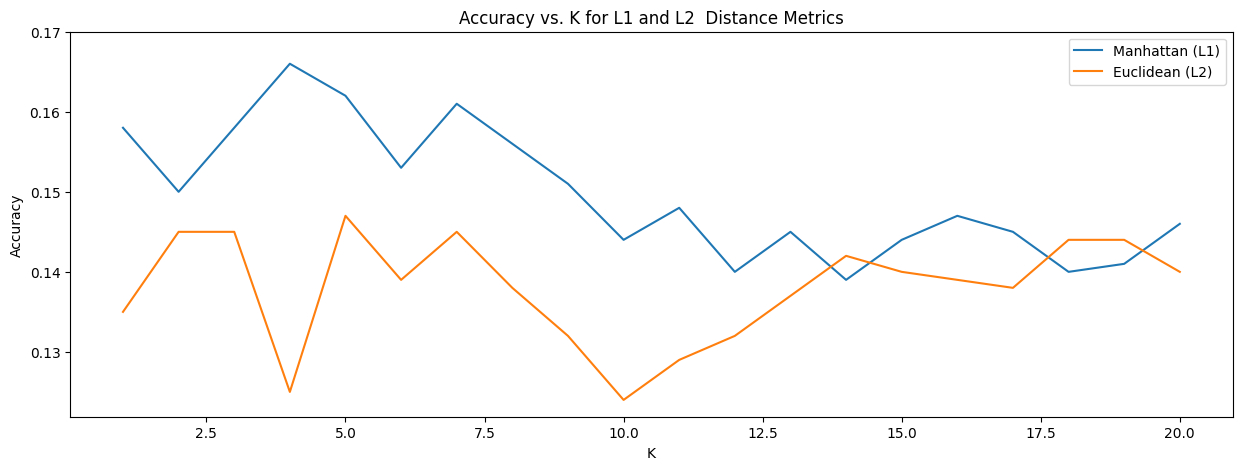

In [11]:
plt.figure(figsize=(15,5))
plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.ylim(top=0.17)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for L1 and L2  Distance Metrics")
plt.legend()
plt.show()


fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]

# ***Discussioon***

The line graph presented above visualizes the accuracy values of two distance metrics, Manhattan (L1) and Euclidean (L2), using 5-fold cross-validation.

Manhattan Distance and Euclidean Distance serve the purpose of quantifying dissimilarity between data points within a vector space. It's important to note that Euclidean distance is notably sensitive to outliers because it squares differences, making larger differences more influential. On the other hand, Manhattan distance is less affected by outliers since it sums up the absolute differences.From the CIFAR-10 dataset, we are utilizing the "test" folder, which includes a total of 10,000 images, each having dimensions of 32x32 pixels and being in color (3 channels). To expedite processing due to time constraints, these images have been converted to grayscale, and they have been evenly distributed into subfolders, resulting in approximately 2,000 images in each subfolder.

Regarding the accuracy vs. k graph:
The K-nearest neighbors (KNN) algorithm relies on a distance metric, which can be either Manhattan or Euclidean, to identify the k-nearest neighbors for a given data point. The graph depicts how accuracy values change as k varies, ranging from 0 to 20.

In the case of Manhattan (L1) accuracy, the graph reveals that accuracy fluctuates during the increment of k-values between 0 and 7. It then exhibits an descending trend, achieving its lowest accuracy of 0.14 at k-value 15.However,the  highest accuracy value 0.165 at k-value 4

In contrast, the accuracy of Euclidean (L2) decreases initially, with a sudden peak at around k-value 4.5. Subsequently, the accuracy gradually declines between k-values 5 to 13. However, there's a steady increase in accuracy, reaching a maximum of 0.145 at the  k-value 14. The lowest L2 accuracy value is at same k value(10) as the L1 distance.
Notably, L2's accuracy experiences a more substantial decrease compared to L1 as the value of k increases.

This analysis highlights the distinct behavior of the two distance metrics in KNN, their sensitivity to outliers, and how the choice of k impacts accuracy differently for each metric.
# ***Limitations***
-  The primary limitation lies in the choice of distance metric. The performance of K-nearest neighbors (KNN) is highly dependent on selecting the appropriate distance metric. While comparison between Manhattan and Euclidean distances, Euclidean distance metrics might perform better for specific datasets as it  achieves highest accuracy rate

-  KNN is affected by the dimensions where the performance degrades as the number of dimensions increases.

- The performance of KNN can be sensitive to the scaling of features that can cause biasing result and normaliation can mitigate this.

- KNN is sensitive to noisy data and outliers. Handling noisy data through robust distance metrics is essential to achieve desired result.

- KNN can be computationally expensive for large datasets, especially in increased dimensional spaces.


In [8]:

print("Top 5 Predictions of Manhattan (L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("-----------------------------------------------")

print("Top 5 Predictions Euclidean (L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

Top 5 Predictions of Manhattan (L1):
Prediction 1: Class [6, 9, 3, 9, 9]
Prediction 2: Class [9, 6, 6, 6, 3]
Prediction 3: Class [9, 5, 3, 6, 3]
Prediction 4: Class [4, 3, 7, 9, 5]
Prediction 5: Class [9, 3, 9, 6, 5]
-----------------------------------------------
Top 5 Predictions Euclidean (L2):
Prediction 1: Class [5, 8, 1, 9, 4]
Prediction 2: Class [6, 3, 9, 3, 3]
Prediction 3: Class [9, 6, 3, 6, 9]
Prediction 4: Class [9, 6, 1, 6, 0]
Prediction 5: Class [5, 3, 5, 9, 9]


In [9]:
for i,j in enumerate(class_name):
 print(f"class[{i}]={j}",end=" ")

class[0]=truck class[1]=dog class[2]=automobile class[3]=deer class[4]=frog class[5]=ship class[6]=bird class[7]=cat class[8]=horse class[9]=airplane 